# Lab 4 Neural Networks
* Nicholas Larsen
* Steven Larsen

In this lab we will explore different kinds of Neural Networks starting with a simple 2 layer Perceptron and ending up with a 5 Layer Perceptron with different kinds of preprocessing and 2 different adaptive learning techniques.

The dataset description can be found here:https://www.kaggle.com/muonneutrino/us-census-demographic-data/data

# Load Split and Balance

## Load into Pandas

In [4]:
import numpy as np
import pandas as pd
import missingno as mn

df = pd.read_csv('./../acs2017_census_tract_data.csv')
df

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5


<AxesSubplot:>

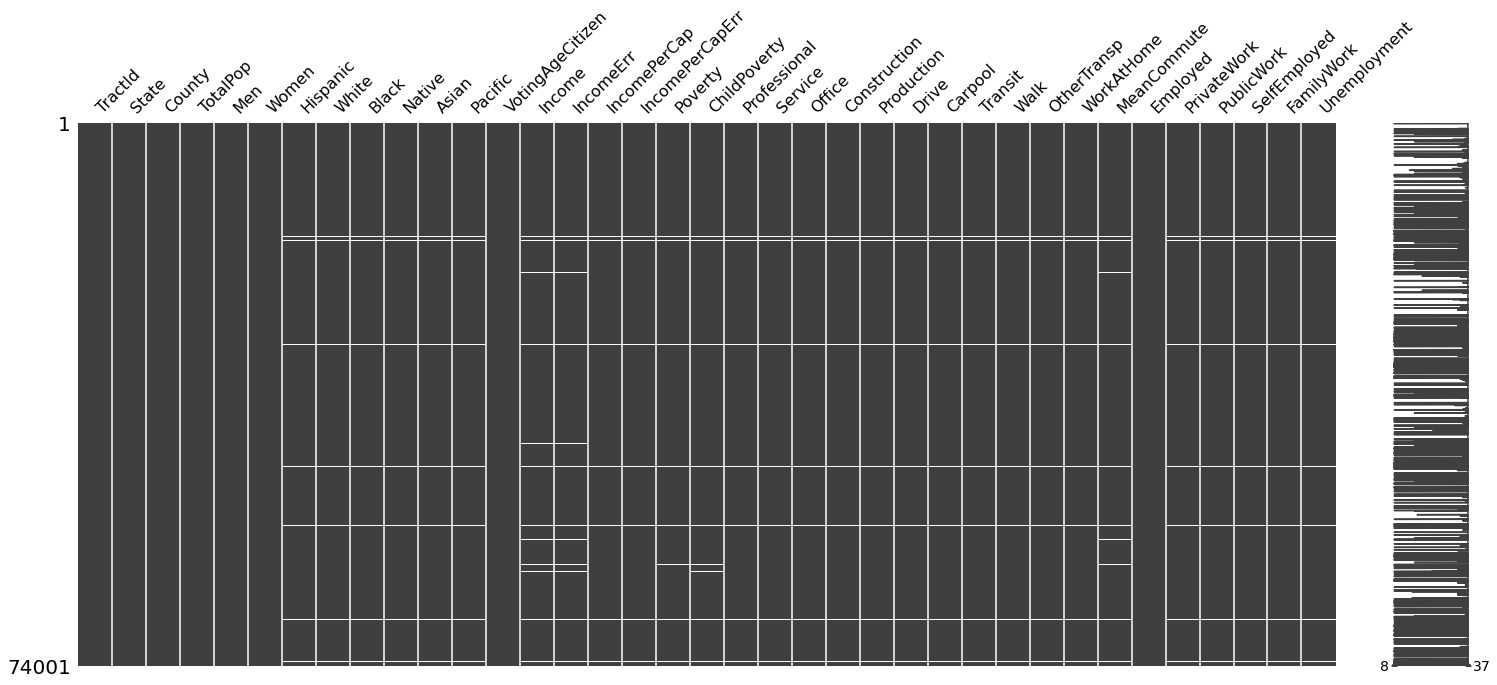

In [5]:
mn.matrix(df)

## Balance the data

Balaning will take place before the train test split. That way the classes are defined the same for both, if the class lines were defined after the train test split the four class lines may be different

In [6]:
df['Poverty'].describe()

count    73159.000000
mean        16.118186
std         12.691045
min          0.000000
25%          6.900000
50%         12.600000
75%         21.800000
max        100.000000
Name: Poverty, dtype: float64

In [24]:
labels = ['low', 'med-low', 'med-high', 'high']
df['poverty_class'] = pd.qcut(df['Poverty'],
                             q=4,
                             labels=labels)
df['poverty_class'].describe()

count     73159
unique        4
top         low
freq      18571
Name: poverty_class, dtype: object

In [41]:
df['poverty_class'].value_counts()

low         18571
high        18254
med-high    18232
med-low     18102
Name: poverty_class, dtype: int64

<AxesSubplot:>

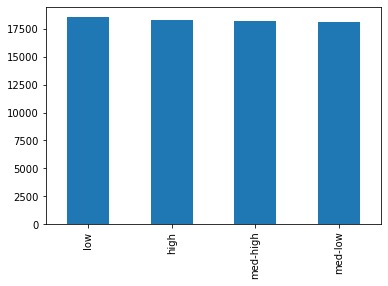

In [31]:
df['poverty_class'].value_counts().plot(kind='bar')
#class_counts = df_class_grouped.count()['poverty_class']
#class_counts.plot(kind='bar')

## Split the data

Size of X Train 59200
Size of X Test 14801
Size of y Train 59200
Size of y Test 14801


<AxesSubplot:>

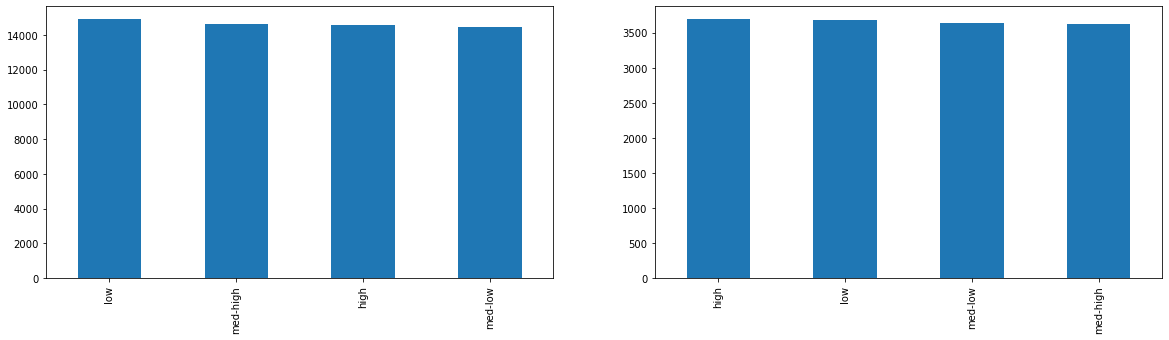

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df_y = df['poverty_class']

X_train, X_test, y_train, y_test = \
    train_test_split(df, df_y, test_size=0.2)
print('Size of X Train', len(X_train))
print('Size of X Test', len(X_test))
print('Size of y Train', len(y_train))
print('Size of y Test', len(y_test))

fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
X_train['poverty_class'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
X_test['poverty_class'].value_counts().plot(kind='bar')

# Pre-processing

## 2 Layer Perceptron 

### Graph Loss

## 2 Layer Perceptron with Normalize 

### Graph Loss

## 2 Layer Perceptron with One-Hot Encoding and Normalized


### Graph Loss

## Compare Results for 2 Layer Perceptrons

# Modeling
## 3 Layer
## 4 Layer
## 5 Layer


## 5 Layer Adaptive

# 5 Layer AdaM